In [2]:
#Importing and loading the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import datetime
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
sns.set_style('darkgrid')

In [4]:
# Reading the file and loading the dataset into dataframe
cars_df = pd.read_csv("used_cars_data.csv")

In [5]:
# Getting first look at data by displaying top 5 rows
cars_df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
# We can see that first column is just a S.No. so the index of dataframe can be set as S.No
cars_df = cars_df.set_index('S.No.')

In [7]:
# Checking whether the index is set 
cars_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
# Rows and columns in dataset
cars_df.shape

(7253, 13)

In [9]:
# Determining the dtypes of each column
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


## Handling Missing Values

In [10]:
# Total of missing values per column
cars_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

###### Insights:

1.Above result shows various column has missing values . <br>
2.Price column which is our target column has around 17% missing values . These rows doesnt help in predicting our target variable , hence can be removed. <br>
3.New_Price Column can be dropped as it has more than 86% of the values as missing <br>
4.Missing values in other columns can be imputed

In [11]:
# Dropping rows of which has NA in price column
cars_df = cars_df[pd.notnull(cars_df['Price'])]
cars_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [12]:
# Dropping New price column
cars_df = cars_df.drop('New_Price',axis=1)
cars_df.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [13]:
#Imputing the missing values by first converting them into numeric 
cars_df.Engine = cars_df.Engine.str.extract('(\d+)').astype(float)
cars_df.Mileage = cars_df.Mileage.str.extract('(\d+)').astype(float)
cars_df.Power = cars_df.Power.str.extract('(\d+)').astype(float)

In [14]:
#Imputing missing values with the most_frequent for Seats and median for rest
imputer = SimpleImputer(missing_values = np.nan, strategy ='median')
cars_df[["Mileage","Engine", "Power"]] = imputer.fit_transform(cars_df[["Mileage","Engine", "Power"]])
imputer_seats = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cars_df[["Seats"]] = imputer_seats.fit_transform(cars_df[["Seats"]])

In [15]:
#to check no missing value is there in datset
cars_df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

## Feature Engineering

In [16]:
#We extract the brandname from the Name of car
cars_df['Brand_name'] = cars_df.Name.apply(lambda x: str(x).split(" ")[0])
cars_df['Brand_name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Brand_name, dtype: int64

###### Insights
We observe that ISUZU and isuzu are same brand so we merge them 

In [17]:
cars_df.loc[cars_df['Brand_name'] == 'Isuzu' ,'Brand_name'] = 'ISUZU'
cars_df['Brand_name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
ISUZU               3
Force               3
Smart               1
Ambassador          1
Bentley             1
Lamborghini         1
Name: Brand_name, dtype: int64

In [18]:
#Age of the car
now = datetime.datetime.now().year
cars_df['Age'] = now - cars_df['Year']
cars_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_name,Age
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.0,998.0,58.0,5.0,1.75,Maruti,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.0,1582.0,126.0,5.0,12.50,Hyundai,7
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.0,1199.0,88.0,5.0,4.50,Honda,11
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.0,1248.0,88.0,7.0,6.00,Maruti,10
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0,1968.0,140.0,5.0,17.74,Audi,9


## Univariate Analysis

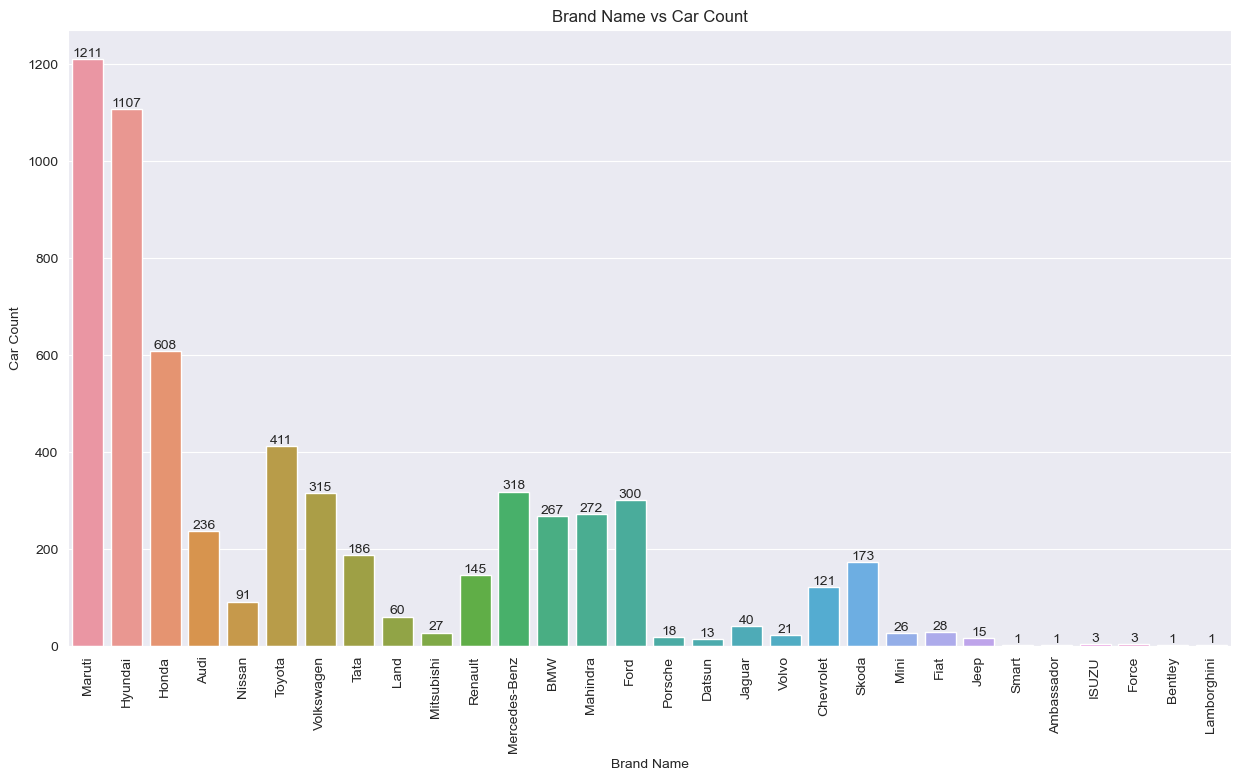

In [22]:
# Cars count vs different brands name
plt.figure(figsize = (15,8))
ax = sns.countplot(x='Brand_name', data=cars_df)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.ylabel("Car Count")
plt.xlabel("Brand Name")
plt.title("Brand Name vs Car Count")
plt.show()

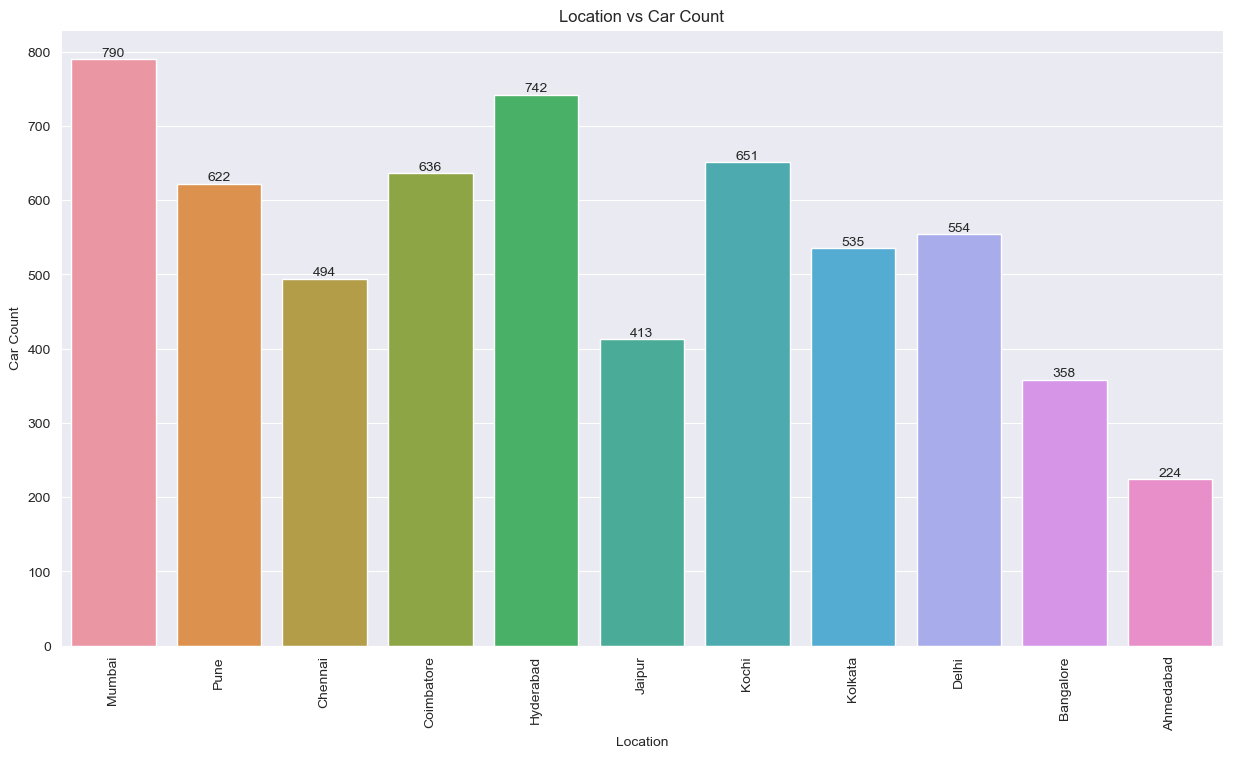

In [23]:
# Cars count vs different locations
plt.figure(figsize = (15,8))
ax = sns.countplot(x='Location', data=cars_df)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.ylabel("Car Count")
plt.xlabel("Location")
plt.title("Location vs Car Count")
plt.show()

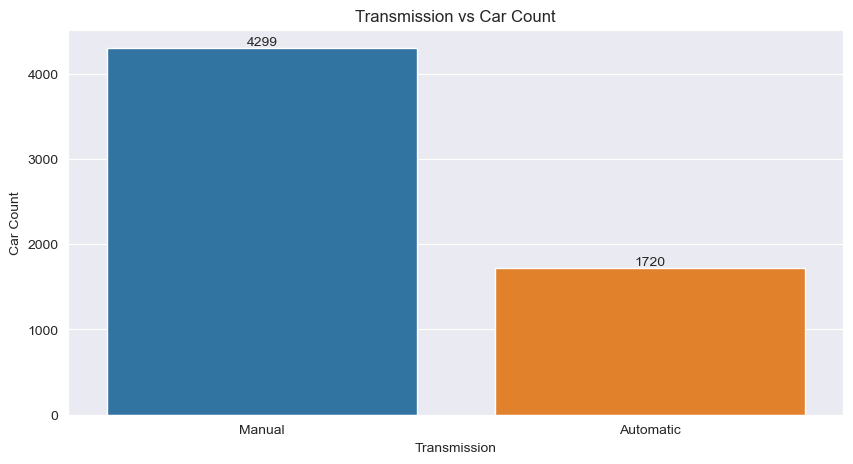

In [24]:
# Cars count vs different type of transmission
plt.figure(figsize = (10,5))
ax = sns.countplot(x='Transmission', data=cars_df)
ax.bar_label(ax.containers[0])
plt.ylabel("Car Count")
plt.xlabel("Transmission")
plt.title("Transmission vs Car Count")
plt.show()

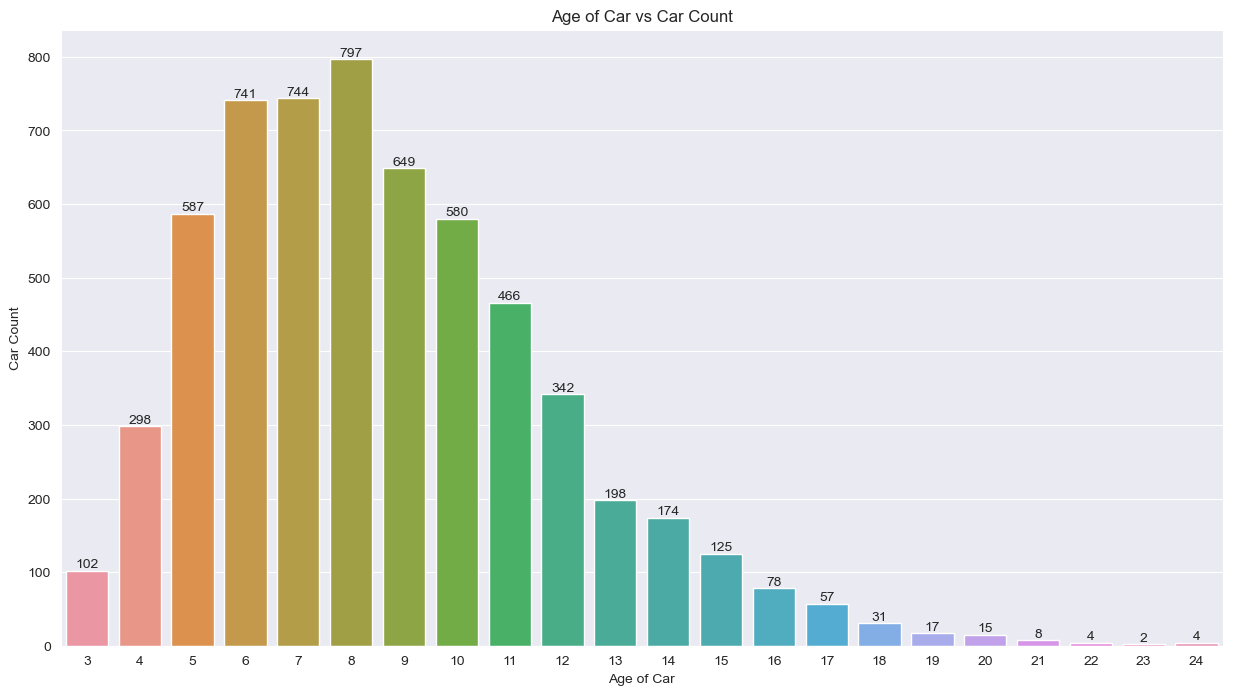

In [25]:
# Cars count vs age of the car
plt.figure(figsize = (15,8))
ax = sns.countplot(x='Age', data=cars_df)
ax.bar_label(ax.containers[0])
plt.ylabel("Car Count")
plt.xlabel("Age of Car")
plt.title("Age of Car vs Car Count")
plt.show()

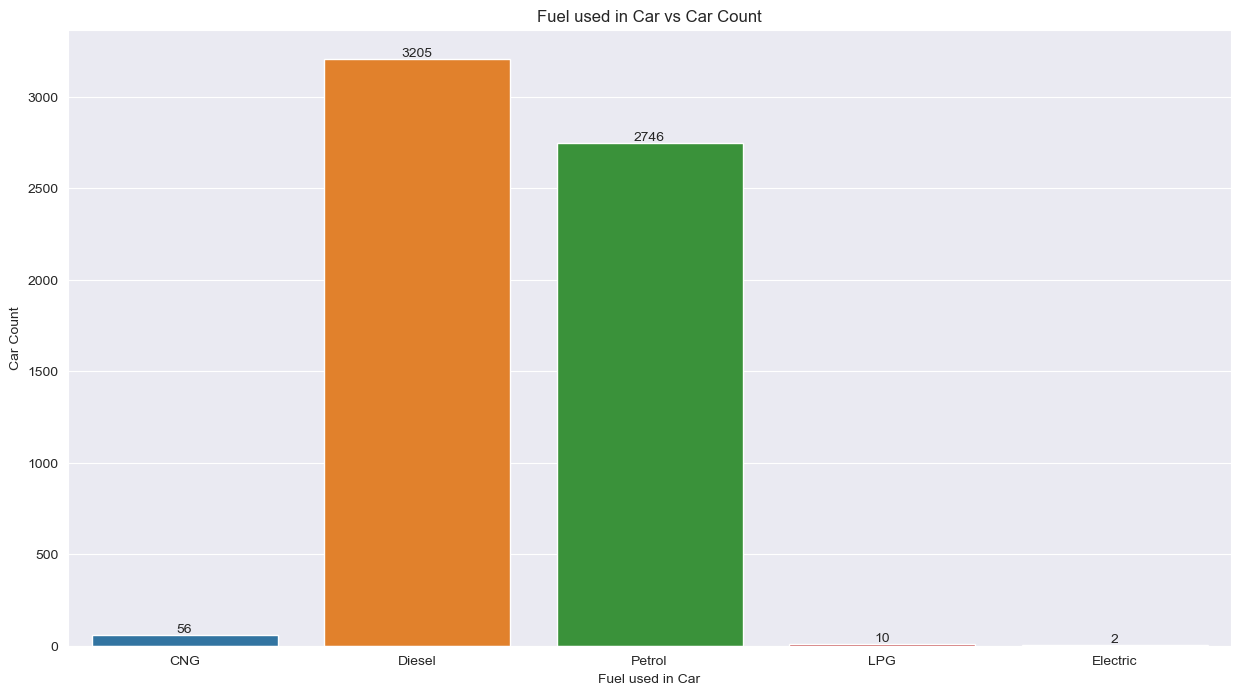

In [26]:
# Cars count vs fuel used in car
plt.figure(figsize = (15,8))
ax = sns.countplot(x='Fuel_Type', data=cars_df)
ax.bar_label(ax.containers[0])
plt.ylabel("Car Count")
plt.xlabel("Fuel used in Car")
plt.title("Fuel used in Car vs Car Count")
plt.show()

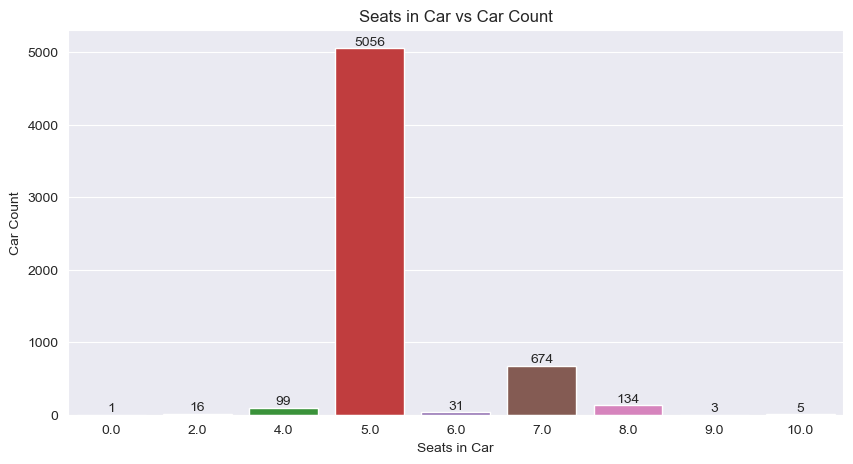

In [27]:
# Cars count vs seats in car
plt.figure(figsize = (10,5))
ax = sns.countplot(x='Seats', data=cars_df)
ax.bar_label(ax.containers[0])
plt.ylabel("Car Count")
plt.xlabel("Seats in Car")
plt.title("Seats in Car vs Car Count")
plt.show()

##### Insights
We can observe from above plot that there is a value where seat is 0 . This scenario cant be possible so we will remove this outlier from our data 

In [28]:
cars_df.drop(cars_df[cars_df['Seats']==0].index,axis=0,inplace=True)
cars_df['Seats'].isin([0]).sum()

0

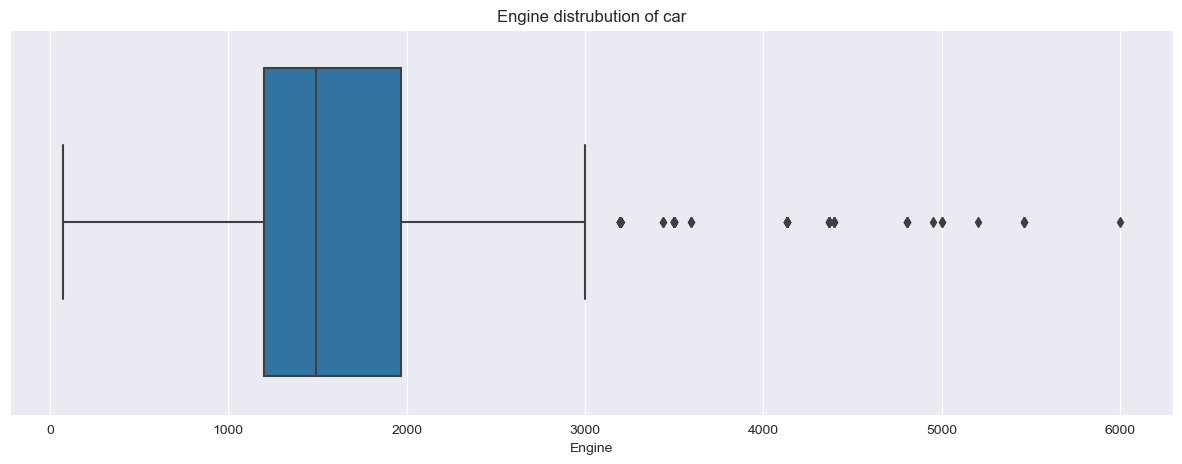

In [29]:
#Boxplot of variable Engine
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x = cars_df['Engine'])
plt.xlabel("Engine")
plt.title("Engine distrubution of car")
plt.show()

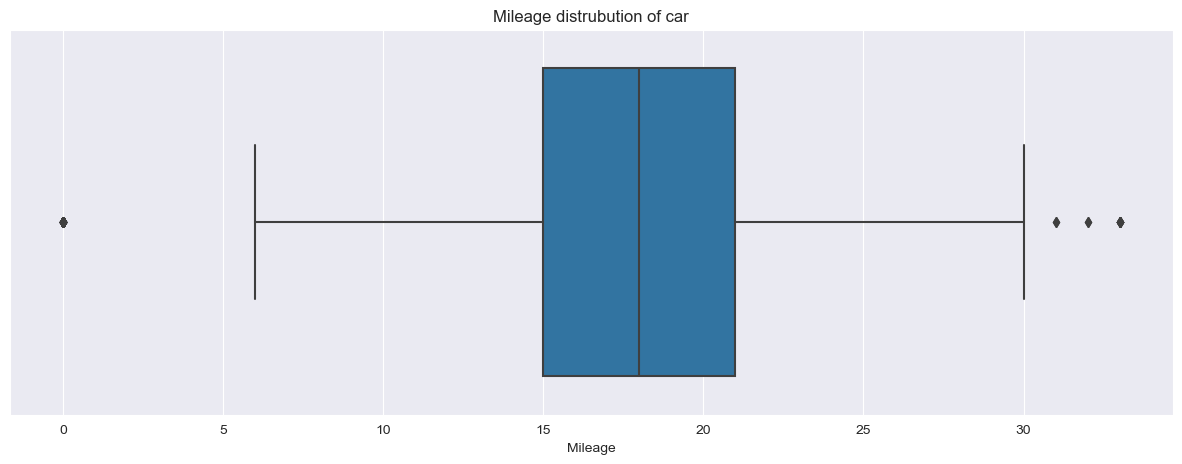

In [30]:
#Boxplot of variable Mileage
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x=cars_df['Mileage'])
plt.xlabel("Mileage")
plt.title("Mileage distrubution of car")
plt.show()

##### Insights
We can observe from above plot that there is a value where mileage is 0 . This scenario cant be possible so we will remove this outlier from our data 

In [31]:
cars_df.drop(cars_df[cars_df['Mileage']==0].index,axis=0,inplace=True)
cars_df['Mileage'].isin([0]).sum()

0

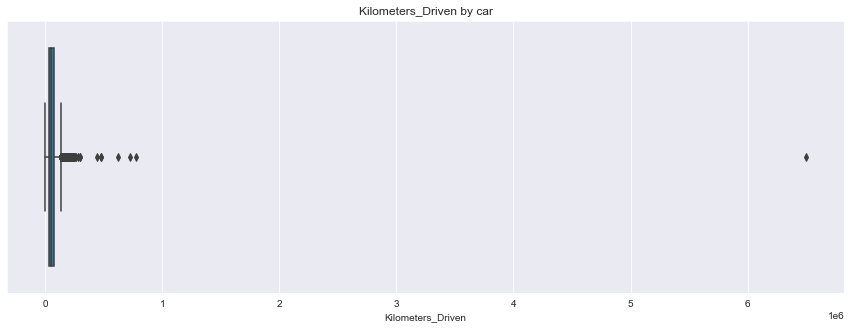

In [233]:
# Boxplot of variable Kilometer Driven
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x=cars_df['Kilometers_Driven'])
plt.xlabel("Kilometers_Driven")
plt.title("Kilometers_Driven by car")
plt.show()

##### Insights
We obeseve that there is only one car which have driven greater than 60000, by the rule of 2 Standard Deviation we remove it.

In [32]:
cars_df.drop(cars_df[cars_df['Kilometers_Driven'] >= 600000].index, axis=0, inplace=True)

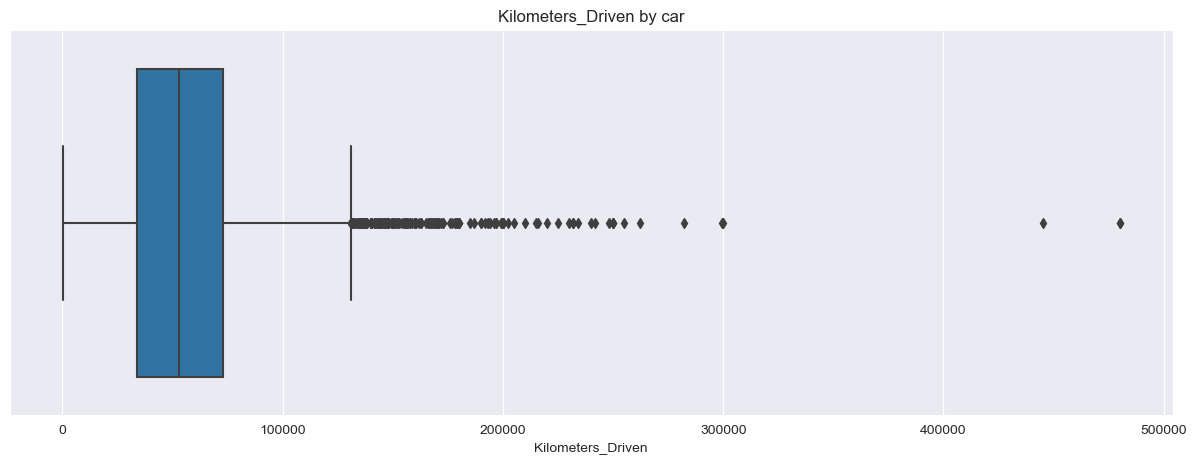

In [33]:
# Boxplot of variable Kilometer Driven
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x=cars_df['Kilometers_Driven'])
plt.xlabel("Kilometers_Driven")
plt.title("Kilometers_Driven by car")
plt.show()

##### Insights
Now we have better graph of box plot . We remove data points greater than 15000 by 2 Standard Deviation rule for better machine learning model.

## Bivrate Analysis

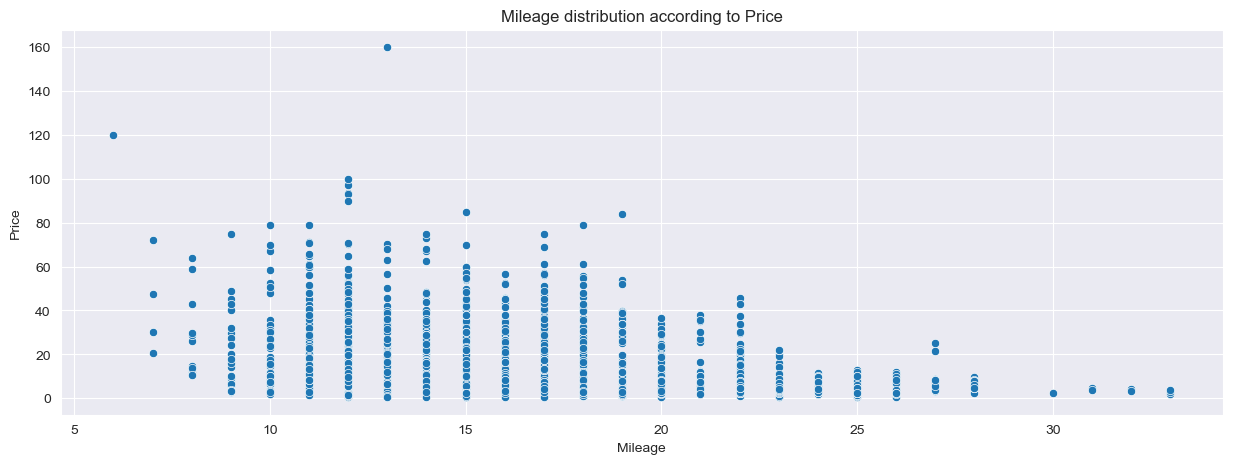

In [34]:
#Mileage distribution according to the price
plt.figure(figsize = (15,5))
sns.scatterplot(data=cars_df, x="Mileage", y="Price")
plt.title("Mileage distribution according to Price")
plt.show()

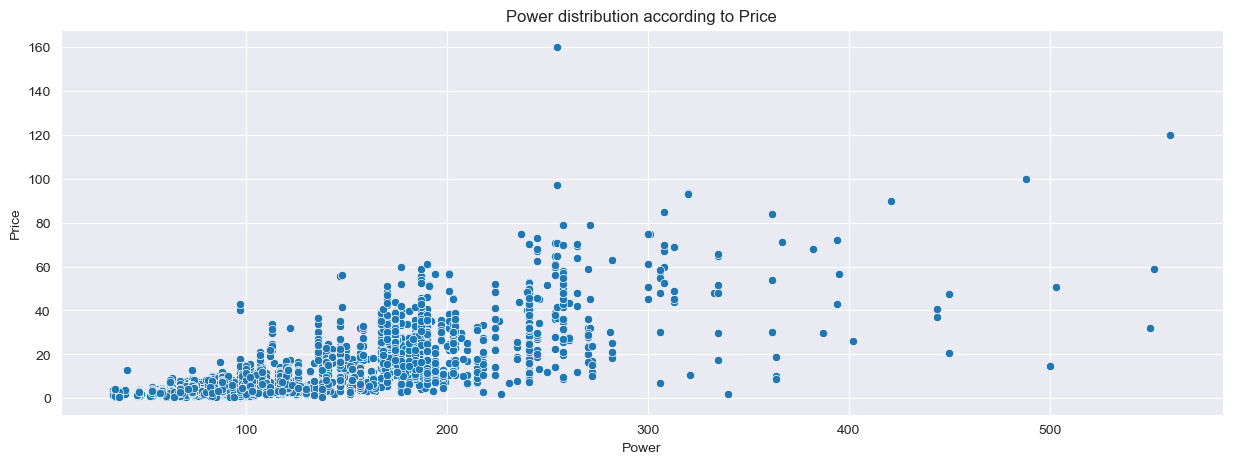

In [35]:
#Power distribution according to the price
plt.figure(figsize = (15,5))
sns.scatterplot(data=cars_df, x="Power", y="Price")
plt.title("Power distribution according to Price")
plt.show()

<AxesSubplot:xlabel='Seats', ylabel='Price'>

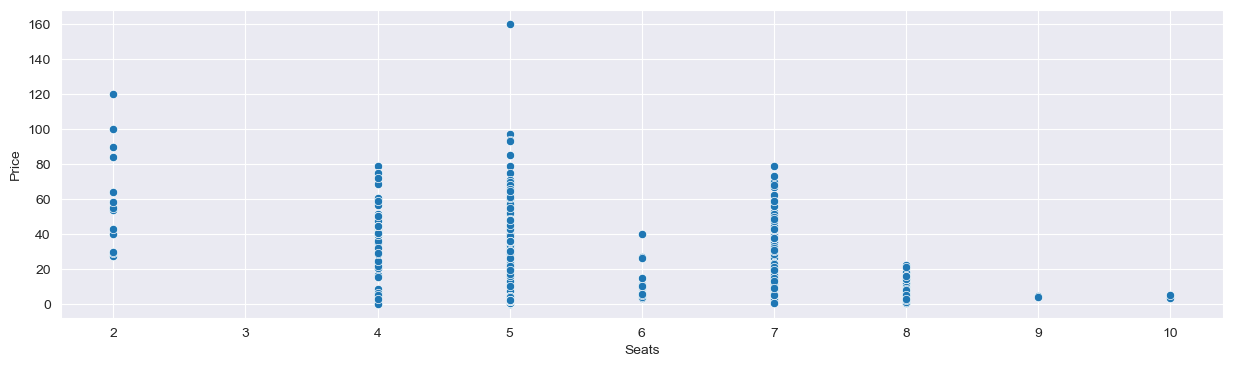

In [39]:
#Seats distribution according to the price
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=cars_df, x="Seats", y="Price")

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

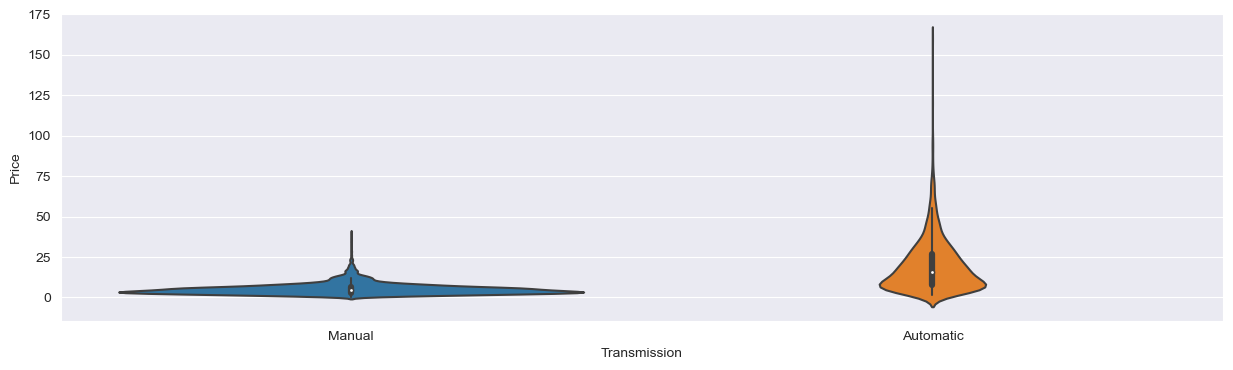

In [40]:
#Transmission distribution according to the price
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(data=cars_df, x="Transmission", y="Price")

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

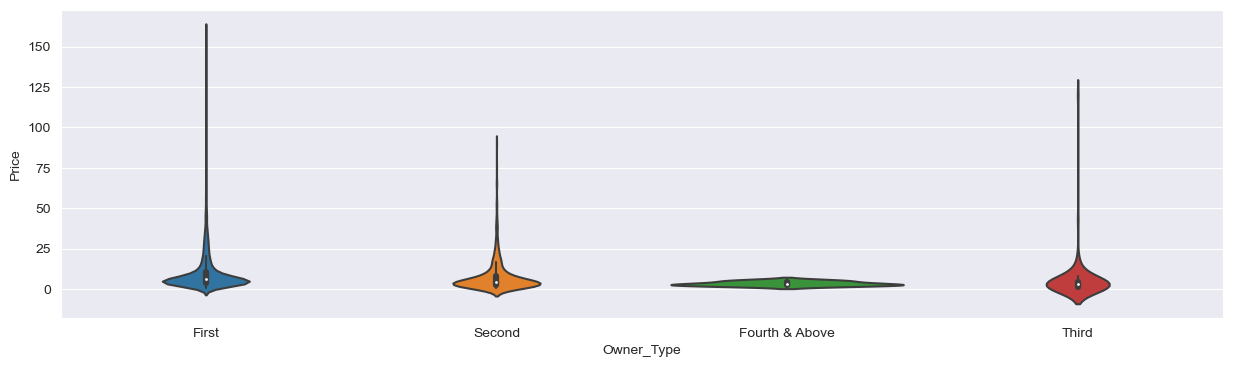

In [42]:
#Owner_Type distribution according to the price
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(data=cars_df, x="Owner_Type", y="Price")

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

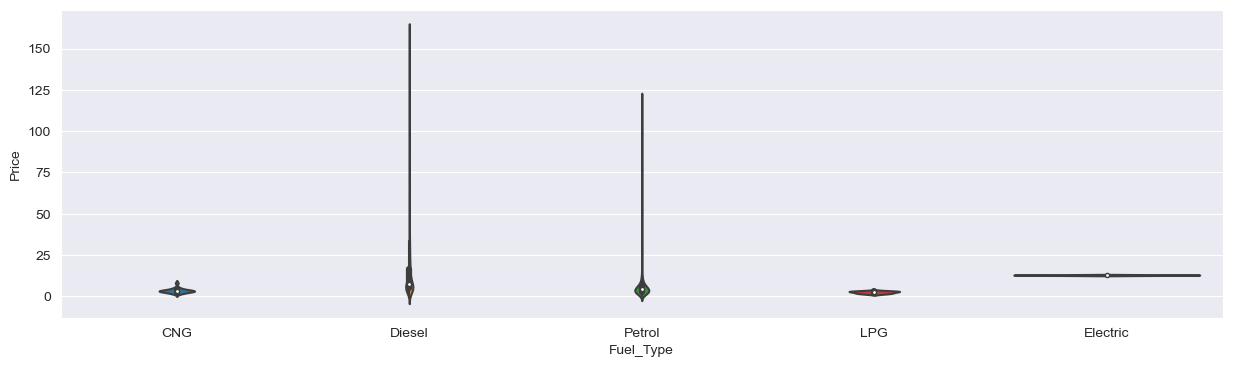

In [44]:
#Fuel_Type distribution according to the price
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(data=cars_df, x="Fuel_Type", y="Price")

##### Insights
1.Automatic Cars are more expensive than manual cars <br>
2.The rate of car has increased over the years <br>
3.Cheaper cars give more mileage <br>
4.First handed cars are expensive closely followed by second hand cars <br>
5.Petrol and diesel cars are costly <br>

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

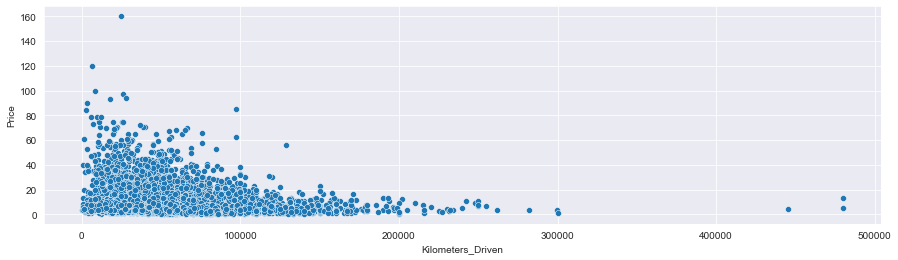

In [247]:
#Kilometer_Driven distribution according to the price
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=cars_df, x="Kilometers_Driven", y="Price")

## Machine Learning

In [45]:
#Encoding Categorical Variable
carsdf_new = pd.get_dummies(cars_df, columns=['Fuel_Type', 'Transmission', 'Owner_Type','Brand_name'],drop_first=True)
carsdf_new.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine',
       'Power', 'Seats', 'Price', 'Age', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_name_Audi', 'Brand_name_BMW',
       'Brand_name_Bentley', 'Brand_name_Chevrolet', 'Brand_name_Datsun',
       'Brand_name_Fiat', 'Brand_name_Force', 'Brand_name_Ford',
       'Brand_name_Honda', 'Brand_name_Hyundai', 'Brand_name_ISUZU',
       'Brand_name_Jaguar', 'Brand_name_Jeep', 'Brand_name_Lamborghini',
       'Brand_name_Land', 'Brand_name_Mahindra', 'Brand_name_Maruti',
       'Brand_name_Mercedes-Benz', 'Brand_name_Mini', 'Brand_name_Mitsubishi',
       'Brand_name_Nissan', 'Brand_name_Porsche', 'Brand_name_Renault',
       'Brand_name_Skoda', 'Brand_name_Tata', 'Brand_name_Toyota',
       'Brand_name_Volkswagen', 'Brand_name_Volvo'],
      dtype='object')

In [46]:
# Applying Macine learning 

#1.Base Model
X=carsdf_new.drop(["Name","Price","Location","Year"],axis='columns')
y = carsdf_new.Price

# Scaling for better model
sc_x = StandardScaler()
X_new = sc_x.fit_transform(X)

# spiltting into training and test
model = linear_model.LinearRegression()  
X_train,X_test,y_train,y_test = train_test_split(X_new, y, test_size=0.20,random_state=10) 
model.fit(X_train,y_train) 

y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)


a = model.coef_
b = model.intercept_,
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])

print("Coefficents of model")
print(cdf)
print("Estimated model intercept, b:" , b)

# Evaluation metrics
# Calculating R-squared 
print("Train R-squared", r2_score(y_train, y_predicted_train))
print("Test R-squared", r2_score(y_test,y_predicted_test))

mse = np.mean((y_test-y_predicted_test)**2)
print("MSE",mse)

print("MAE",mean_absolute_error(y_test, y_predicted_test))

Coefficents of model
                           Coefficients
Kilometers_Driven             -0.700499
Mileage                       -0.300704
Engine                         1.864589
Power                          4.062525
Seats                          0.067061
Age                           -2.938729
Fuel_Type_Diesel               0.287836
Fuel_Type_Electric             0.228995
Fuel_Type_LPG                  0.100816
Fuel_Type_Petrol              -0.221916
Transmission_Manual            0.047039
Owner_Type_Fourth & Above      0.030500
Owner_Type_Second             -0.177955
Owner_Type_Third               0.151602
Brand_name_Audi                0.286223
Brand_name_BMW                 0.127014
Brand_name_Bentley             0.037761
Brand_name_Chevrolet          -1.170248
Brand_name_Datsun             -0.432394
Brand_name_Fiat               -0.545635
Brand_name_Force              -0.289729
Brand_name_Ford               -1.561338
Brand_name_Honda              -2.644940
Brand_name_Hyundai 

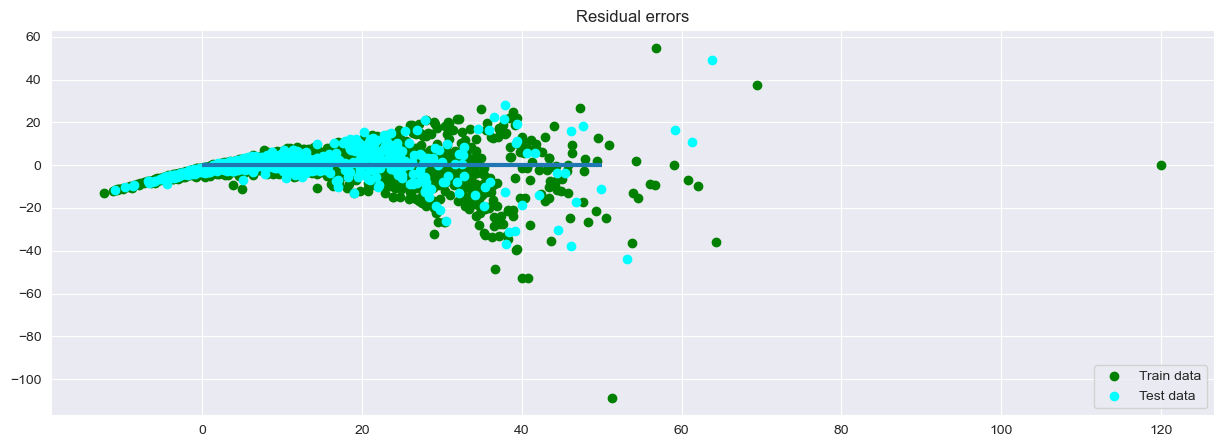

In [47]:
# Plotting residual errors
plt.figure(figsize = (15,5))
plt.scatter(y_predicted_train, y_predicted_train - y_train, color = 'green', label = 'Train data')
plt.scatter(y_predicted_test, y_predicted_test - y_test, color = 'cyan', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()